Yuhan Chen DCSI 552

3009389875

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import _tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_absolute_error

# 1. Decision Trees as Interpretable Models

Download the Accute Inflamations data from
https://archive.ics.uci.edu/
ml/datasets/Acute+Inflammations

In [2]:
df=pd.read_csv("../data/diagnosis.data",sep="\t",header=None,encoding='utf-16le')
with open("../data/diagnosis.names") as f:
    print(f.read())

Title: Acute Inflammations

Abstract: The data was created by a medical expert as a data set to test 
the expert system, which will perform the presumptive diagnosis of two 
diseases of the urinary system.
	
----------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Categorical, Integer
Associated Tasks: Classification
Number of Instances: 120
Number of Attributes: 6
Missing Values? No
Area: Life
Date Donated: 2009-02-11

----------------------------------------------------------------------------

Source:

Jacek Czerniak, Ph.D., Assistant Professor
Systems Research Institute
Polish Academy of Sciences
Laboratory of Intelligent Systems
ul. Newelska 6, Room 218
01-447 Warszawa, Poland
e-mail: jacek.czerniak 'at' ibspan.waw.pl or jczerniak 'at' ukw.edu.pl 

----------------------------------------------------------------------------


Data Set Information:

The main idea of this data set is to prepare t

In [3]:
column_name= ['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing (continuous need for urination)','Micturition pains','Burning of urethra, itch, swelling of urethra outlet','Inflammation of urinary bladder','Nephritis of renal pelvis origin']
df.columns = column_name
df['Temperature of patient']=df['Temperature of patient'].apply(lambda x:"".join(x.replace(",","."))).astype('float')

In [4]:
df = df.replace('yes',1)
df = df.replace('no',0)

(b) Build a decision tree on the whole data set and plot it.


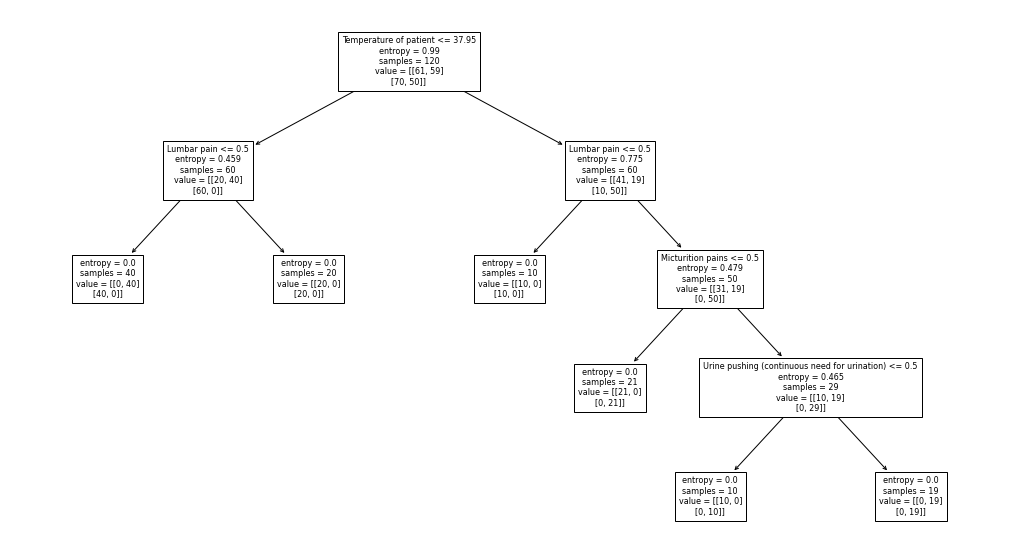

In [5]:
from sklearn import tree
df_x=df.iloc[:,:6]
df_y=df.iloc[:,6:]
dt=tree.DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(df_x,df_y)
plt.figure(figsize=(18,10))
tree.plot_tree(dt,feature_names=column_name[:6],class_names=column_name[6:],fontsize=8)
plt.show()

(c) Convert the decision rules into a set of IF-THEN rules

In [6]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [7]:
tree_to_code(dt,column_name[:6])

def tree(Temperature of patient, Occurrence of nausea, Lumbar pain, Urine pushing (continuous need for urination), Micturition pains, Burning of urethra, itch, swelling of urethra outlet):
  if Temperature of patient <= 37.95000076293945:
    if Lumbar pain <= 0.5:
      return [[ 0. 40.]
 [40.  0.]]
    else:  # if Lumbar pain > 0.5
      return [[20.  0.]
 [20.  0.]]
  else:  # if Temperature of patient > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar pain > 0.5
      if Micturition pains <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Micturition pains > 0.5
        if Urine pushing (continuous need for urination) <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine pushing (continuous need for urination) > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.


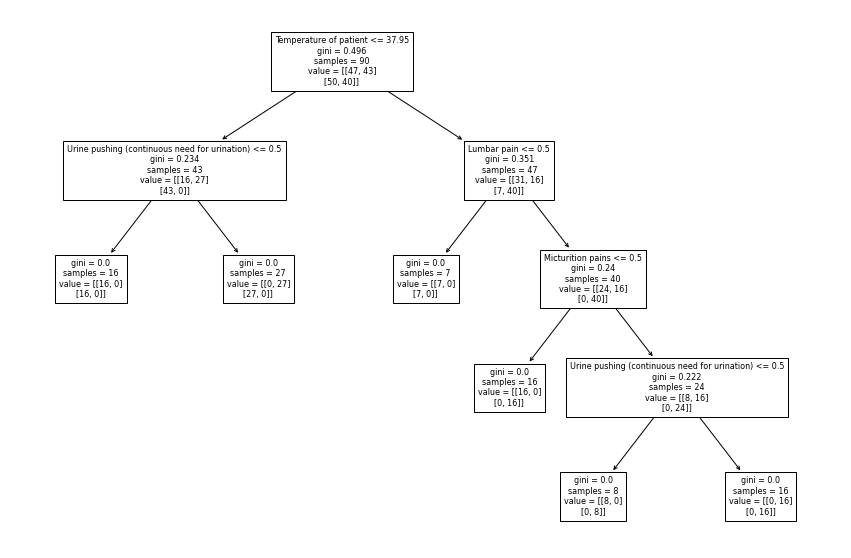

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=0)
mse=[]
tr=tree.DecisionTreeClassifier(random_state=0)
path=tr.cost_complexity_pruning_path(df_x,df_y)
pth_list=path.ccp_alphas
for i in pth_list:
    model_1= tree.DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    model_1.fit(x_train,y_train)
    score=-1*cross_val_score(model_1,x_train,y_train,cv=5,scoring='neg_mean_squared_error').mean()
    mse.append(score)
a = pth_list[mse.index(min(mse))]
t=tree.DecisionTreeClassifier(random_state=0, ccp_alpha=a)
t.fit(x_train,y_train)
plt.figure(figsize=(15,10))
tree.plot_tree(t,feature_names=column_name[:6],class_names=column_name[6:],fontsize=8)
plt.show()

# 2. The LASSO and Boosting for Regression

### (a).Download the dataset and using the first 1495 rows of the dataset as the training data

In [9]:
df=pd.read_csv("../data/communities.data")
i =0 
with open("../data/communities.names") as f:
    print(f.read())
names_df = pd.read_csv("../data/communities.names", sep=" ", skiprows = 75, header = None, nrows = 128)
names = list(names_df[1])
df.columns = names
train_df = pd.DataFrame(df[0:1495])
train_df.columns = names
test_df = pd.DataFrame(df[1495:])
test_df.columns = names
test_df.reset_index(drop=True,inplace=True)

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

### b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [10]:
from sklearn.impute import SimpleImputer
def impute(df):
    df_1 = pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df),columns=df.columns)     
    return df_1


In [11]:
train_1 = train_df.drop(['state', 'county', 'community', 'communityname', 'fold'], axis = 1)
test_1 = test_df.drop(['state', 'county', 'community', 'communityname', 'fold'], axis = 1)
train_1 = train_1.replace("?", np.nan)
test_1= test_1.replace("?", np.nan)
train_im = impute(train_1)
test_im = impute(train_1)

### c) Plot a correlation matrix for the features in the data set.

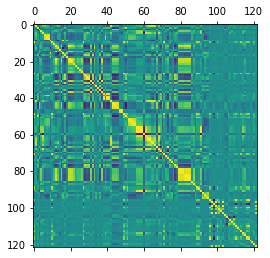

In [12]:
df_2 = df.iloc[:,5:]
df_2 = df_2.replace("?", np.nan)
df_im2 = impute(df_2).iloc[:,:-1]
plt.matshow(df_im2.corr())
plt.show()

### (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation andm is sample mean..

In [13]:
def CV(i):
    return np.std(i)/np.mean(i)
dict_CV = {}
col_names =df_im2.columns
for name in col_names:
    dict_CV[name] = CV(df_im2[name])
df_CV = pd.DataFrame(dict_CV.items(), columns=['feature', 'CV'])
df_CV

,feature,CV
0,population,2.205444
1,householdsize,0.353188
2,racepctblack,1.410151
3,racePctWhite,0.323784
4,racePctAsian,1.359004
...,...,...
117,PolicOperBudg,0.728931
118,LemasPctPolicOnPatr,0.122271
119,LemasGangUnitDeploy,0.368184
120,LemasPctOfficDrugUn,2.557782


### (e) 128⌋ features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

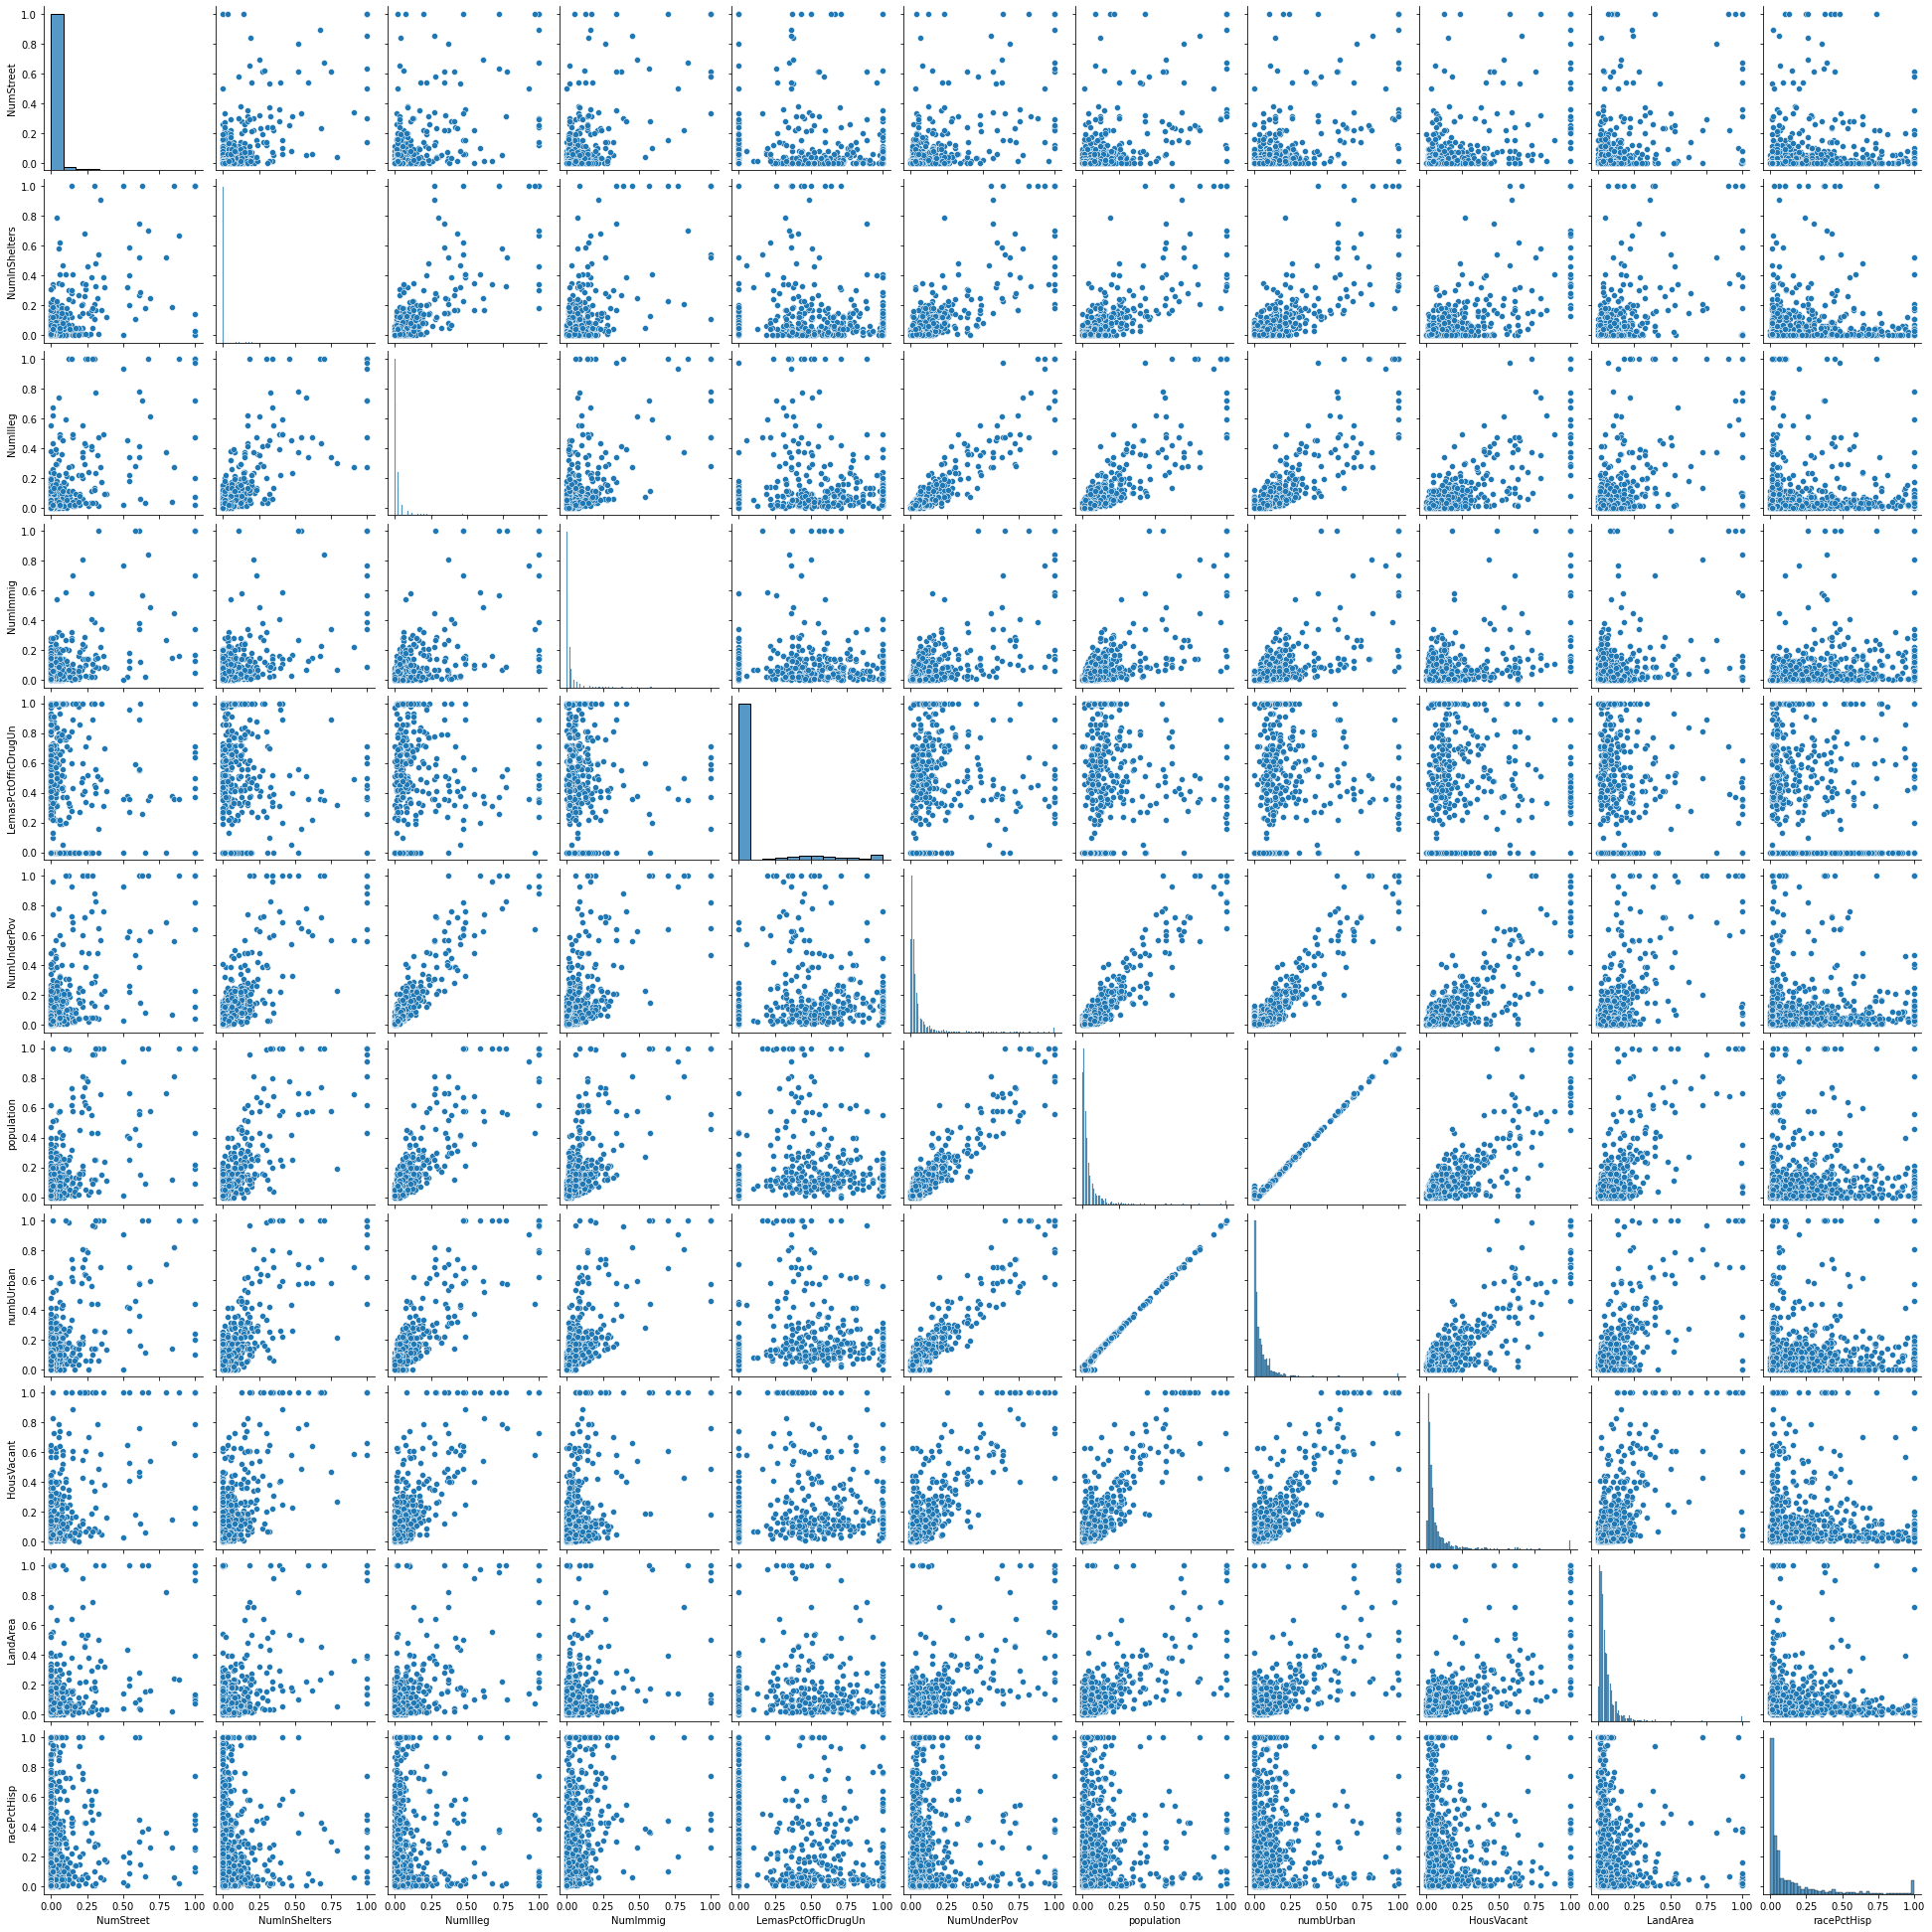

In [14]:
CV=df_CV.sort_values(by=['CV'],ascending=False)
CV_plot=CV.iloc[:int(np.sqrt(128)),:]
df2=df_im2[CV_plot['feature']]
sns.pairplot(df2)

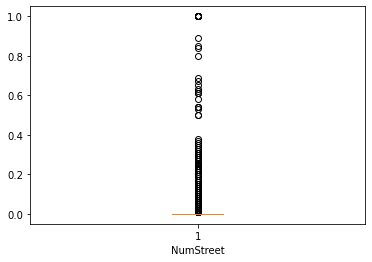

In [15]:
plt.boxplot(df2.iloc[:,0])
plt.xlabel(df2.columns[0])
plt.show()

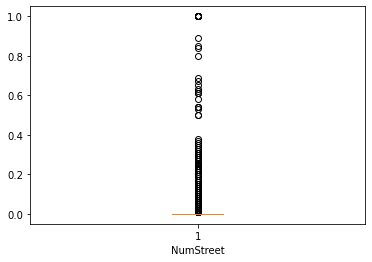

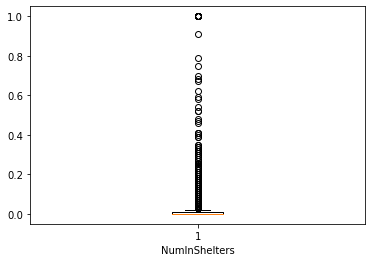

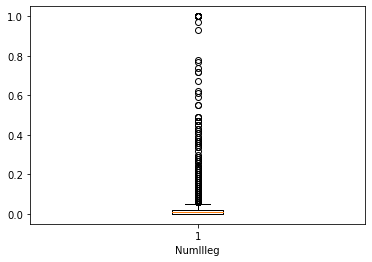

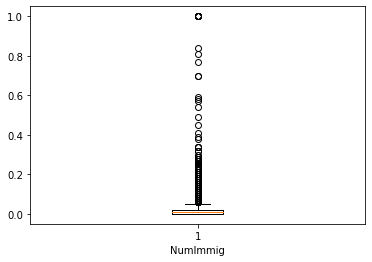

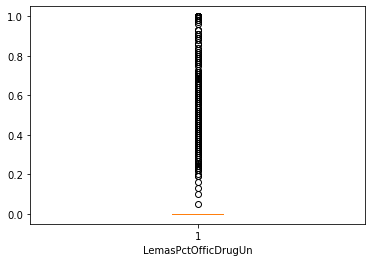

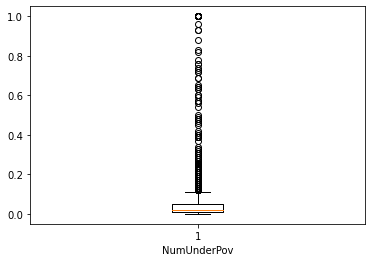

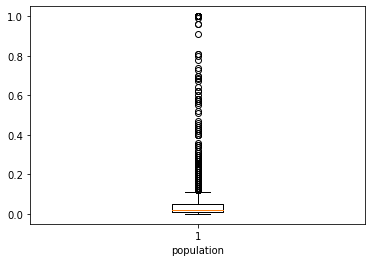

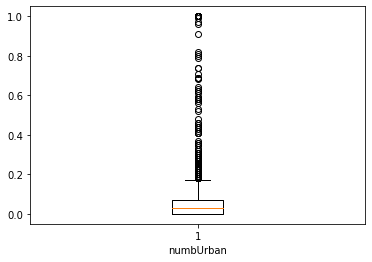

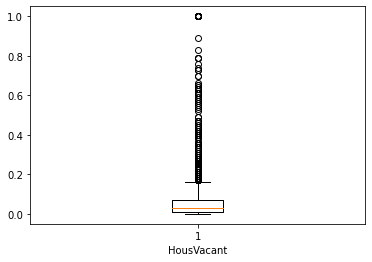

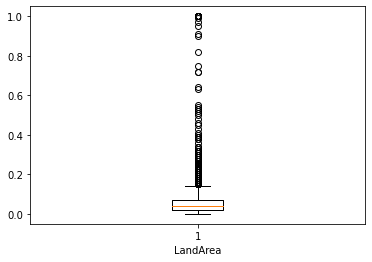

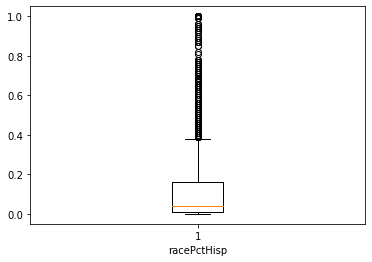

In [16]:
for i in range(0,11):
    plt.boxplot(df2.iloc[:,i])
    plt.xlabel(df2.columns[i])
    plt.show()

I cannot draw conclusion about significance of those features just based on the scatter plots.

### (f)  Fit a linear model using least squares to the training set and report the test error.

In [17]:
# train_im = impute(train_1)
# test_im = impute(train_1)
train_x=train_im .iloc[:,:-1]
train_y=train_im .iloc[:,-1:]
test_x=test_im.iloc[:,:-1]
test_y=test_im.iloc[:,-1:]

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression().fit(train_x, train_y)
pred_y = model_2.predict(test_x)
test_error = mean_squared_error(test_y, pred_y)
test_error


0.016307552178649234

### (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [19]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

def SC(df):
    result = StandardScaler().fit(df).transform(df)
    return result
train_x_g = SC(train_x)
test_x_g = SC(test_x)

model_3=RidgeCV(cv=5)
model_3.fit(train_x_g,train_y)
score = 1-model_3.score(test_x_g,test_y)
score

0.29141891930158226

### (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized 4 features. Report the test error for both cases and compare them

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from itertools import compress
import warnings 
warnings.filterwarnings('ignore')
m_h = LassoCV(cv=5)
fit_h = m_h.fit(train_x, train_y)
sel_h = SelectFromModel(m_h)
sel_h.fit(train_x, train_y)
selected_features = sel_h.get_support()
res_h = list(compress(list(train_x.columns), list(selected_features)))
test_error = 1 - fit_h.score(test_x, test_y)
print("test error: {}".format(test_error))
print("selected features: {}".format(res_h))
print("number of features selected: {}".format(len(res_h)))

test error: 0.30062336053424144
selected features: ['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBorn

In [21]:
model_4=LassoCV(cv=5,normalize=True)
m_h2=SelectFromModel(m_h)
m_h2.fit(train_x,train_y)
1-model_4.fit(train_x,train_y).score(test_x,test_y)

0.3039718492827457

In [23]:
m_h2.get_feature_names_out()

array(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
       'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap',
       'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
       'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy',
       'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10',
       'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup',
       'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous',
       'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup',
       'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ',
       'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
       'MedOwnCostPctIncNoMtg', 'Nu

There is not major difference between standardized and un-standardized data

### (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [24]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [25]:
x_train=np.array(train_x)
y_train=np.array(train_y)
x_test=np.array(test_x)
y_test=np.array(test_y)
pca = PCA()
x_reduced_train = pca.fit_transform(scale(x_train))
x_reduced_test = pca.fit_transform(scale(x_test))
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=99)
mse=[]
for i in np.arange(1,len(train_x.columns)+1):
    CV_score=model_selection.cross_val_score(LinearRegression(),x_reduced_train[:,:i],y_train.ravel(),cv=cv,scoring='neg_mean_squared_error')
    score = -1*CV_score.mean()
    mse.append(score)
min_index=mse.index(min(mse))

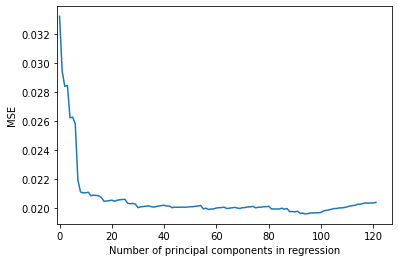

In [26]:
plt.plot(mse)
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.xlim(xmin=-1)
plt.show()

In [27]:
min_index=mse.index(min(mse))
model_5=LinearRegression().fit(x_reduced_train[:,:mse.index(min(mse))],y_train)
y_pred=model_5.predict(x_reduced_test[:,:mse.index(min(mse))])
mean_squared_error(y_test,y_pred)

0.01672258108950347

In [28]:
!pip install xgboost
import xgboost as xgb

In [29]:
# train_im = impute(train_1)
# test_im = impute(train_1)
import warnings 
warnings.filterwarnings('ignore')
alpha_list = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
alpha_list = np.power(10, alpha_list)
trainMatrix = xgb.DMatrix(data=train_x, label=train_y)
dict_alpha={}
for alpha in alpha_list:
    score = xgb.cv({'max_depth':6, 'eta':0.3,'silent':1, 'objective':'reg:linear', 'alpha':alpha},
                    trainMatrix, num_boost_round=100, nfold=5,metrics='rmse') 
    mse = np.mean(score['test-rmse-mean'])
    dict_alpha[alpha] = mse

[14:06:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:06:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboos

[14:06:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:06:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboos

[14:06:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:06:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboos

[14:06:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:06:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboos

In [30]:
df_dict_alpha = pd.DataFrame(dict_alpha.items(), columns=['alpha', 'mse'])
df_dict_alpha

,alpha,mse
0,1.000000,0.148067
1,1.000000,0.148067
2,1.000000,0.148107
3,1.000002,0.148107
4,1.000023,0.148107
5,1.000230,0.148135
6,1.002305,0.148776
7,1.023293,0.148966
8,1.258925,0.148204
9,10.000000,0.152163


alpha = 1.000000002302585

In [31]:
dict_alpha

{1.000000002302585: 0.14806721768670847,
 1.0000000230258512: 0.14806721768670847,
 1.0000002302585358: 0.14810744588212774,
 1.000002302587744: 0.14810744566203746,
 1.0000230261160268: 0.1481074457923717,
 1.0002302850208247: 0.14813459137353943,
 1.0023052380778996: 0.14877581262437553,
 1.023292992280754: 0.14896624029633004,
 1.2589254117941673: 0.14820393040670093,
 10.0: 0.15216284607880678}